# Visualize Age Trends

## Use FedScope datasets to visualize trends in aging for Federal Employees

By: Colton Lapp
colton.lapp@gsa.gov

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

### Set up paths

In [4]:
# get root dir which ends in repo_name
repo_name = 'Fed_IT_Employment'
root = os.getcwd()
while os.path.basename(root) != repo_name:
    root = os.path.dirname(root)

# Get raw data directory
rdir = os.path.join( root, 'data', 'raw_data')

print(f"Base directory: {root}\nRaw data directory: {rdir}")

Base directory: /Users/coltonlapp/Dropbox/My Mac (Coltons-MacBook-Pro.local)/Desktop/Work/USDC/publicwork/Fed_IT_Employment
Raw data directory: /Users/coltonlapp/Dropbox/My Mac (Coltons-MacBook-Pro.local)/Desktop/Work/USDC/publicwork/Fed_IT_Employment/data/raw_data


### Read in data

In [5]:
# Read in processed FedScope data

emp_fedscope = pd.read_csv(os.path.join(root, 'data', 'processed_data', 'FedScope_emp_data_concat.csv'))

# Convert date to datetime
emp_fedscope['date'] = pd.to_datetime(emp_fedscope['date'])

emp_fedscope.head()

/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_13157/387829143.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  emp_fedscope = pd.read_csv(os.path.join(root, 'data', 'processed_data', 'FedScope_emp_data_concat.csv'))


,location,age,occupation,occupation_category,pay_plan_grade,date,agency,agency_sub,ed_level,ed_level_detailed
0,11-DISTRICT OF COLUMBIA,65 or more,301,2,EX-02,2010-03-01,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,DOCTORATE,21-DOCTORATE DEGREE
1,IT-ITALY,60-64,1630,2,GS-12,2010-03-01,AB-AMERICAN BATTLE MONUMENTS COMMISSION,AB00-AMERICAN BATTLE MONUMENTS COMMISSION,BETWEEN HS & BACHELORS,07-SOME COLLEGE - LESS THAN ONE YEAR
2,FR-FRANCE,50-54,1630,2,GS-12,2010-03-01,AB-AMERICAN BATTLE MONUMENTS COMMISSION,AB00-AMERICAN BATTLE MONUMENTS COMMISSION,HIGH SCHOOL OR EQUIVALENCY,04-HIGH SCHOOL GRADUATE OR CERTIFICATE OF EQUI...
3,BE-BELGIUM,60-64,1630,2,GS-12,2010-03-01,AB-AMERICAN BATTLE MONUMENTS COMMISSION,AB00-AMERICAN BATTLE MONUMENTS COMMISSION,HIGH SCHOOL OR EQUIVALENCY,04-HIGH SCHOOL GRADUATE OR CERTIFICATE OF EQUI...
4,FR-FRANCE,55-59,301,2,GS-15,2010-03-01,AB-AMERICAN BATTLE MONUMENTS COMMISSION,AB00-AMERICAN BATTLE MONUMENTS COMMISSION,MASTERS,17-MASTER'S DEGREE


# Analysis

---


## 1. Distribution of age in December 2023 (latest data)

Show distribution for both:
- IT Jobs
- All Federal Jobs

In [6]:
# IT series codes to include as "Tech workers"
IT_series = [
    '2210' # IT Management
    ,'1515' # OR
    ,'1550' # Comp Sci
    ,'1520' # Math
    ,'1560' # Data Science
]

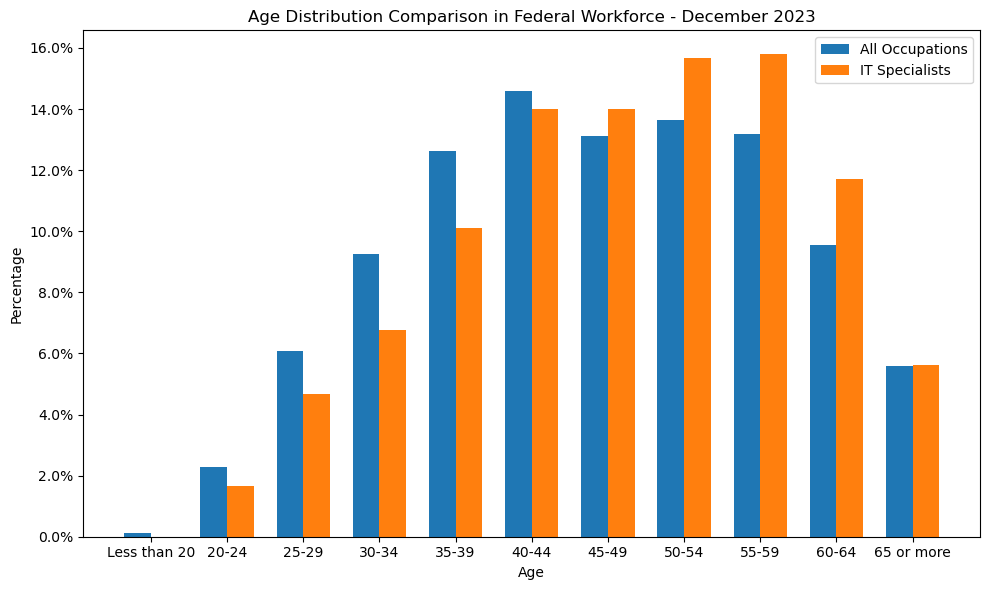

In [7]:
# ---------------------- Filter Data and Calculate Counts/Percentages ----------------------#

dec_2023 = pd.to_datetime('20231201', format='%Y%m%d')

# Subset the data to only include December 2023
df_2023 = emp_fedscope[emp_fedscope['date'] == dec_2023]

# Subset the data to only include IT specialists
df_IT = df_2023[df_2023['occupation'].isin(IT_series)]

# cateogrical order of ages (for plotting)
ages = ['Less than 20', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65 or more']


# Filter ages to only include those in df_IT 
ages = [age for age in ages if age in df_IT['age'].unique()]

# Calculate value counts as percentages
age_counts_all = df_2023['age'].value_counts(normalize=True).loc[ages] * 100

# Calculate value counts as percentages
age_counts_IT = df_IT['age'].value_counts(normalize=True).loc[ages] * 100


# --------------------- Make Bar Graph --------------------#

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the positions for the bars
bar_width = 0.35
index = range(len(ages))

# Plot the bars
bars_all = ax.bar(index, age_counts_all, bar_width, label='All Occupations')
bars_IT = ax.bar([i + bar_width for i in index], age_counts_IT, bar_width, label='IT Specialists')

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Percentage')
ax.set_title('Age Distribution Comparison in Federal Workforce - December 2023')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(ages)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend()

plt.tight_layout()
plt.show()

# save figure to root/output
fig.savefig(os.path.join(root, 'output', 'FED_all_v_IT_age_distribution_comparison_2023.png'))

## 2. Visualize Time Series of Age Composition Over Time

For each unique date, calculate percentage of workforce in each age group for entire dataset and IT workforce 

In [8]:
# --------------------- Calculate Age Distribution Over Time --------------------#

# Create a dictionary to store the results
age_counts = {}

# Iterate over the unique dates
for date in emp_fedscope['date'].unique():

    # Subset the data to the current date
    df_date = emp_fedscope[emp_fedscope['date'] == date]
    # Subset IT workers
    df_date_IT = df_date[df_date['occupation'].isin(IT_series)] 

    # Subset the age groups that are present in the data
    ages_in_df = [age for age in ages if age in df_date_IT['age'].unique()]
    
    # Calculate the percentage of workers in each age group
    age_counts_all = df_date['age'].value_counts(normalize=True).loc[ages_in_df] * 100
    age_counts_IT = df_date_IT['age'].value_counts(normalize=True).loc[ages_in_df] * 100
    
    # Make date key by dropping time from date
    date_key = date.date()

    # Store the results in the dictionary
    age_counts[date_key] = {'All Occupations': age_counts_all, 'IT Specialists': age_counts_IT}
    

# Show example of first date in the dictionary
for my_dict in age_counts:
    print(f"Date: {my_dict}")
    for age, percentage in age_counts[my_dict]['IT Specialists'].items():
        print(f"\t Age: {age} - Percentage: {percentage:.2f}%")

    break

Date: 2010-03-01
	 Age: Less than 20 - Percentage: 0.02%
	 Age: 20-24 - Percentage: 1.14%
	 Age: 25-29 - Percentage: 4.97%
	 Age: 30-34 - Percentage: 7.41%
	 Age: 35-39 - Percentage: 9.46%
	 Age: 40-44 - Percentage: 13.66%
	 Age: 45-49 - Percentage: 19.54%
	 Age: 50-54 - Percentage: 19.38%
	 Age: 55-59 - Percentage: 14.61%
	 Age: 60-64 - Percentage: 7.44%
	 Age: 65 or more - Percentage: 2.37%


In [9]:
# --------------------- Create Time Series of Specific Age Categories --------------------#

# Create a DataFrame to store the results
df_age = pd.DataFrame()

# List to store rows to concatenate later into a DF
rows = []

for date, counts in age_counts.items():
    if counts['All Occupations'].shape[0] != 0 :
        # Create a dictionary to store calculations we want to graph
        row = {
                'date': date,

                # Age group 20 to 29
                'ages_20_to_29': (counts['All Occupations'].loc['20-24'] + counts['All Occupations'].loc['25-29']),

                'ages_20_to_29_IT': (counts['IT Specialists'].loc['20-24'] + counts['IT Specialists'].loc['25-29']),

                # Age group 30 to 49
                'ages_30_to_49': (counts['All Occupations'].loc['30-34'] + 
                                counts['All Occupations'].loc['35-39'] +
                                counts['All Occupations'].loc['40-44'] +
                                counts['All Occupations'].loc['45-49']),

                'ages_30_to_49_IT': (counts['IT Specialists'].loc['30-34'] + 
                                    counts['IT Specialists'].loc['35-39'] +
                                    counts['IT Specialists'].loc['40-44'] + 
                                    counts['IT Specialists'].loc['45-49']),

                # Age group 50 and older
                'ages_50_or_more': (counts['All Occupations'].loc['50-54'] + 
                                    counts['All Occupations'].loc['55-59'] + 
                                    counts['All Occupations'].loc['60-64'] + 
                                    counts['All Occupations'].loc['65 or more']),

                'ages_50_or_more_IT': (counts['IT Specialists'].loc['50-54'] + 
                                    counts['IT Specialists'].loc['55-59'] + 
                                    counts['IT Specialists'].loc['60-64'] + 
                                    counts['IT Specialists'].loc['65 or more']),

                'ages_30_to_59' : (counts['All Occupations'].loc['30-34'] +
                                    counts['All Occupations'].loc['35-39'] +
                                    counts['All Occupations'].loc['40-44'] +
                                    counts['All Occupations'].loc['45-49'] +
                                    counts['All Occupations'].loc['50-54'] +
                                    counts['All Occupations'].loc['55-59']),
                'ages_30_to_59_IT' : (counts['IT Specialists'].loc['30-34'] +
                                    counts['IT Specialists'].loc['35-39'] +
                                    counts['IT Specialists'].loc['40-44'] +
                                    counts['IT Specialists'].loc['45-49'] +
                                    counts['IT Specialists'].loc['50-54'] +
                                    counts['IT Specialists'].loc['55-59']),

                # Age group 60 and older
                'ages_60_or_more': (counts['All Occupations'].loc['60-64'] + 
                                    counts['All Occupations'].loc['65 or more']),

                'ages_60_or_more_IT': (counts['IT Specialists'].loc['60-64'] + 
                                    counts['IT Specialists'].loc['65 or more'])
            }


        # Append the dictionary to the list
        rows.append(row)


# Concatenate all DataFrames in the list
df_age = pd.DataFrame(rows)

df_age.head()

,date,ages_20_to_29,ages_20_to_29_IT,ages_30_to_49,ages_30_to_49_IT,ages_50_or_more,ages_50_or_more_IT,ages_30_to_59,ages_30_to_59_IT,ages_60_or_more,ages_60_or_more_IT
0,2010-03-01,10.601569,6.107803,47.154134,50.077874,41.966841,43.799053,77.761874,84.069324,11.359101,9.807604
1,2011-03-01,10.442519,6.228585,47.150795,49.977710,42.186307,43.772052,77.630215,83.963622,11.706887,9.786139
2,2012-03-01,9.556960,5.642373,47.349507,50.176638,42.942792,44.165902,78.138002,84.443243,12.154296,9.899297
3,2013-03-01,8.824611,5.125903,47.505263,49.110362,43.575119,45.756376,78.517170,84.379461,12.563212,10.487277
4,2014-03-01,7.775665,3.826655,47.428115,47.182096,44.746123,48.989513,79.005495,84.294048,13.168744,11.877561


## Graph 1: For Each Age Group, compare IT vs Fed Gov

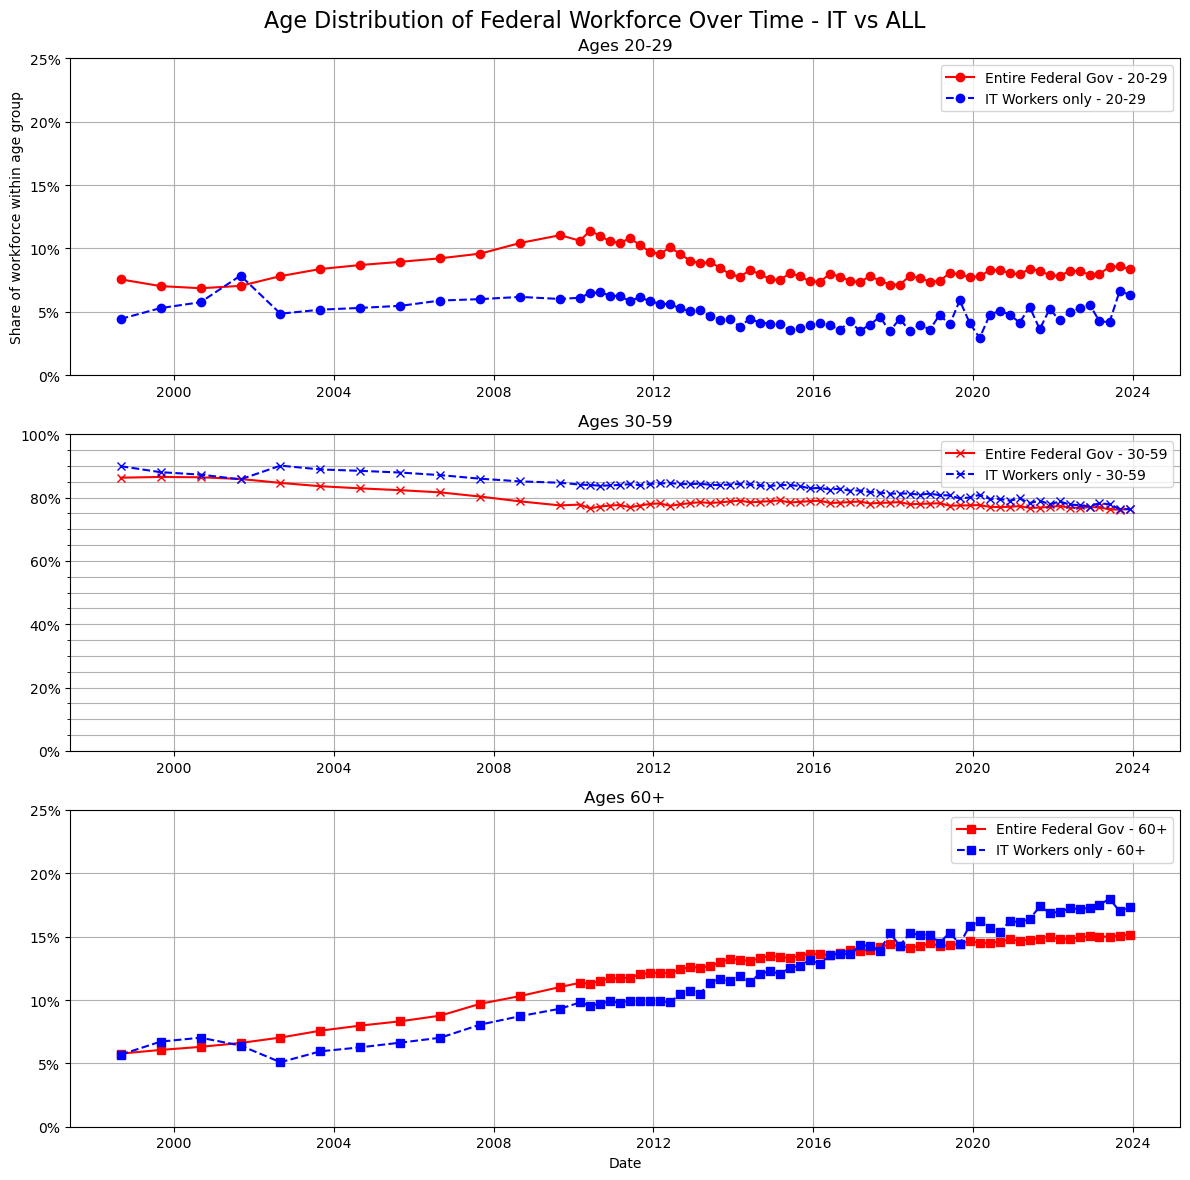

In [13]:
# --------------------- Create Time Series of Specific Age Categories --------------------#

# Set the plot size
fig, axes = plt.subplots(3, 1, figsize=(12, 12))  # 3 rows, 1 column for subplots

# Sort by date
df_age = df_age.sort_values('date')

# Plot the 20-29 age group on the first subplot
axes[0].plot(df_age['date'], df_age['ages_20_to_29'], color='red', linestyle='-', marker='o', label='Entire Federal Gov - 20-29')
axes[0].plot(df_age['date'], df_age['ages_20_to_29_IT'], color='blue', linestyle='--', marker='o', label='IT Workers only - 20-29')
axes[0].set_ylim(0, 25)
axes[0].set_title('Ages 20-29')
axes[0].set_ylabel('Share of workforce within age group')
axes[0].legend()
axes[0].grid(True)

# Plot the 30-59 age group on the second subplot
axes[1].plot(df_age['date'], df_age['ages_30_to_59'], color='red', linestyle='-', marker='x', label='Entire Federal Gov - 30-59')
axes[1].plot(df_age['date'], df_age['ages_30_to_59_IT'], color='blue', linestyle='--', marker='x', label='IT Workers only - 30-59')
axes[1].set_title('Ages 30-59')
axes[0].set_ylabel('Share of workforce within age group')
axes[1].set_ylim(0, 100)
axes[1].legend()
axes[1].yaxis.set_minor_locator(plt.MultipleLocator(5))
axes[1].grid(True, which='minor', axis='y')
axes[1].grid(True)

# Plot the 60 or more age group on the third subplot
axes[2].plot(df_age['date'], df_age['ages_60_or_more'], color='red', linestyle='-', marker='s', label='Entire Federal Gov - 60+')
axes[2].plot(df_age['date'], df_age['ages_60_or_more_IT'], color='blue', linestyle='--', marker='s', label='IT Workers only - 60+')
axes[2].set_title('Ages 60+')
axes[2].set_xlabel('Date')
axes[2].set_ylim(0, 25)
axes[0].set_ylabel('Share of workforce within age group')
axes[2].legend()
axes[2].grid(True)

# Format the y-axis as a percentage for all subplots
for ax in axes:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Set title for entire plot
fig.suptitle('Age Distribution of Federal Workforce Over Time - IT vs ALL', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

# save figure to root/output
fig.savefig(os.path.join(root, 'output', 'FED_all_v_IT_age_distribution_over_time_1.png'))

# Graph 2: For each job series (IT vs Fed Gov), compare ages

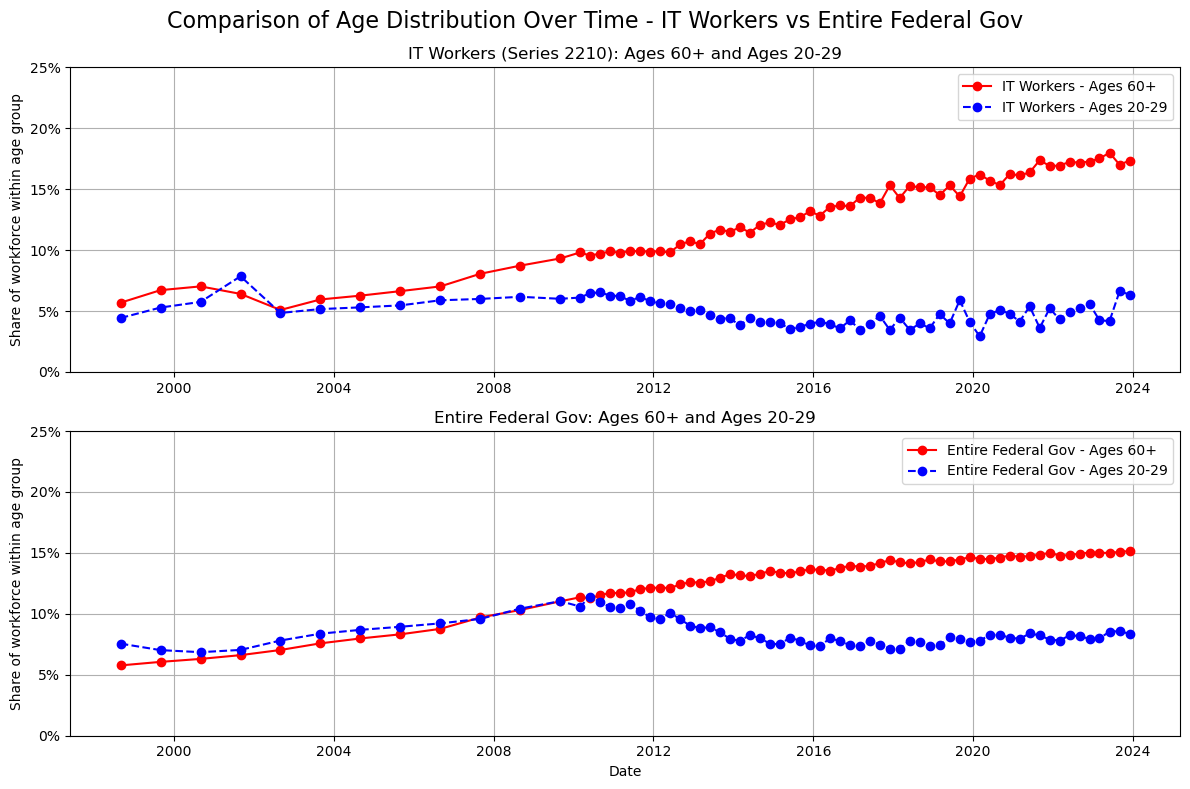

In [14]:
# --------------------- Create Time Series of Specific Age Categories --------------------#

# Set the plot size
fig, axes = plt.subplots(2, 1, figsize=(12, 8))  # 2 rows, 1 column for subplots

# Sort by date
df_age = df_age.sort_values('date')

# Plot ages_60_or_more_IT and ages_20_to_29_IT on the top subplot
axes[0].plot(df_age['date'], df_age['ages_60_or_more_IT'], color='red', linestyle='-', marker='o', label='IT Workers - Ages 60+')
axes[0].plot(df_age['date'], df_age['ages_20_to_29_IT'], color='blue', linestyle='--', marker='o', label='IT Workers - Ages 20-29')
axes[0].set_title('IT Workers (Series 2210): Ages 60+ and Ages 20-29')
axes[0].set_ylabel('Share of workforce within age group')
axes[0].set_ylim(0, 25)
axes[0].legend()
axes[0].grid(True)

# Plot ages_60_or_more and ages_20_to_29 on the bottom subplot
axes[1].plot(df_age['date'], df_age['ages_60_or_more'], color='red', linestyle='-', marker='o', label='Entire Federal Gov - Ages 60+')
axes[1].plot(df_age['date'], df_age['ages_20_to_29'], color='blue', linestyle='--', marker='o', label='Entire Federal Gov - Ages 20-29')
axes[1].set_title('Entire Federal Gov: Ages 60+ and Ages 20-29')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Share of workforce within age group')
axes[1].set_ylim(0, 25)
axes[1].legend()
axes[1].grid(True)

# Format the y-axis as a percentage for all subplots
for ax in axes:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Set title for entire plot
fig.suptitle('Comparison of Age Distribution Over Time - IT Workers vs Entire Federal Gov', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

# save figure to root/output
fig.savefig(os.path.join(root, 'output', 'FED_all_v_IT_age_distribution_over_time_2.png')) 